In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid_size = 5
boxes = grid_size * grid_size

In [3]:
#Create player class for creating instance of a player

class Player():
    def __init__(self,player_name):
        self.player_name = player_name
        self.current_postn = 1
    
    # Method for updating postion of player rolling dice
    def roll_dice(self,dice_read):
        self.current_postn += dice_read
    
    #method to reset scores after game over
    def reset_score(self):
        self.current_postn = 0

In [4]:
#Function to start game

def game(player, dice_read):
    # define number of boxes/position
    #should be a square
    winner = ""
    if player.current_postn + dice_read > boxes :
        print("Score exceeds max possible position")
    else :
        player.roll_dice(dice_read)
        if player.current_postn == boxes :
            winner = player.player_name
            print(player.player_name, " wins")
    return winner

In [5]:
# create players automatically
players = []
def create_players():
    #create players if no players created yet
    if players == []:
        player_names = ["one","two","three","four"]
        for i in player_names:
            p = Player(player_name=i)
            players.append(p)

In [6]:
#reset game after game over
def reset(players):
    for i in players:
        i.reset_score()

In [7]:
#create function to get dice read automatically using random function
import random
def dice_roll():
    dice_nos = range(1,7)
    return random.choice(dice_nos)
dice_roll()

2

In [38]:
def plot_board():
    #create figure using matplotlib
    fig, ax = plt.subplots()
    #dont show axes
    plt.axis('off')
    #set figure size
    plt.rcParams['figure.figsize'] = [10, 10]
    position = range(1,grid_size+1)
    #create matrix of grid size square
    arr = np.reshape(range(boxes,0,-1),(grid_size,grid_size))
    ax.matshow(arr)

    for i in range(grid_size):
        #get alternate reversed arrays
        r = list(reversed(arr[i])) if (i+1)%2==0 else arr[i]
        for j in range(grid_size):
            #no of box
            c = r[j]
            #players at this position
            plrs = [p.player_name for p in players if p.current_postn == c]
            if plrs : c = str(c) + '\n' + str(plrs)
            ax.text(j, i, str(c), va='center', ha='center', size='large')
    return plt.show()

In [40]:
# function to play the game
import time

def play(players):
    plot_board()
    winner = ''
    while winner == '':
        #show current scores of players
        for i in players:
            print(i.player_name,' is at ',i.current_postn)
            dice_r = dice_roll()
            #show current player
            print(i.player_name,' : ',dice_r)
            winner = game(i, dice_r)
            time.sleep(0.5)
            clear_output(wait=True)
            plot_board()
            if winner != '':
                print("Game Over")
                reset(players)
                break

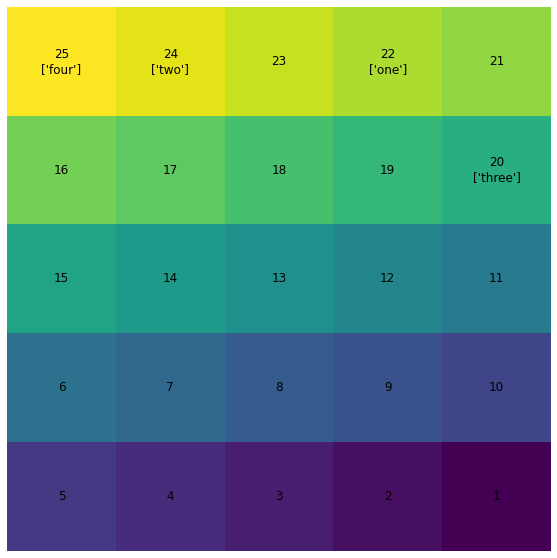

Game Over


In [43]:
create_players()
play(players)